# 1. Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import seaborn as sns

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 2. Load Train Data 

In [117]:
df = pd.read_csv("train.csv")

In [118]:
df

,id,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews
0,0,0.000000,False,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...","Jul 2, 2018","10 Dec, 2013",372.0,96.0
1,1,0.016667,True,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...","Nov 26, 2016","12 Aug, 2015",23.0,0.0
2,2,0.000000,False,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...","Jul 2, 2018","28 Jan, 2014",3018.0,663.0
3,3,1.533333,False,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...","Nov 28, 2016","31 Mar, 2010",63078.0,1746.0
4,4,22.333333,False,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...","Mar 4, 2018","30 Jul, 2012",8841.0,523.0
5,5,2.933333,False,25800.0,RPG,"Single-player,Online Co-op,Local Co-op,Shared/...","RPG,Open World,Survival,Co-op,Fantasy,Online C...",NaN,"26 Mar, 2019",NaN,NaN
6,6,2.616667,False,3600.0,"Action,Indie","Single-player,Steam Achievements,Steam Trading...","Great Soundtrack,Action,Violent,Indie,Top-Down...","Feb 16, 2018","23 Oct, 2012",39776.0,1035.0
7,7,0.150000,True,0.0,Simulation,"Single-player,Multi-player,Online Multi-Player...","VR,Simulation,Utilities,Multiplayer","Jan 29, 2018","28 Apr, 2016",33.0,3.0
8,8,0.016667,False,4000.0,"Adventure,RPG","Single-player,Steam Achievements,Steam Trading...","RPG,Turn-Based,Adventure,Fantasy,Great Soundtr...","Nov 23, 2018","25 Feb, 2014",1875.0,39.0
9,9,0.016667,False,8800.0,"Action,Adventure","Single-player,Steam Achievements,SteamVR Colle...","Action,Adventure,VR,Shooter,Puzzle,FPS,First-P...","Dec 22, 2017","17 Oct, 2017",47.0,11.0


In [119]:
df.isna().sum() #checking for null values - no need to drop any columns as most have non-null values

id                        0
playtime_forever          0
is_free                   0
price                     0
genres                    0
categories                0
tags                      0
purchase_date             2
release_date              0
total_positive_reviews    2
total_negative_reviews    2
dtype: int64

# 3. Preprocessing

# 3.1 Imputation

## Missing Data

In [121]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
df = df[df.columns[df.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
df = df.loc[df.isnull().mean(axis=1) < threshold]

## Nulls

In [161]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

## Boolean Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B57F3CAC8>,
      dtype=object)

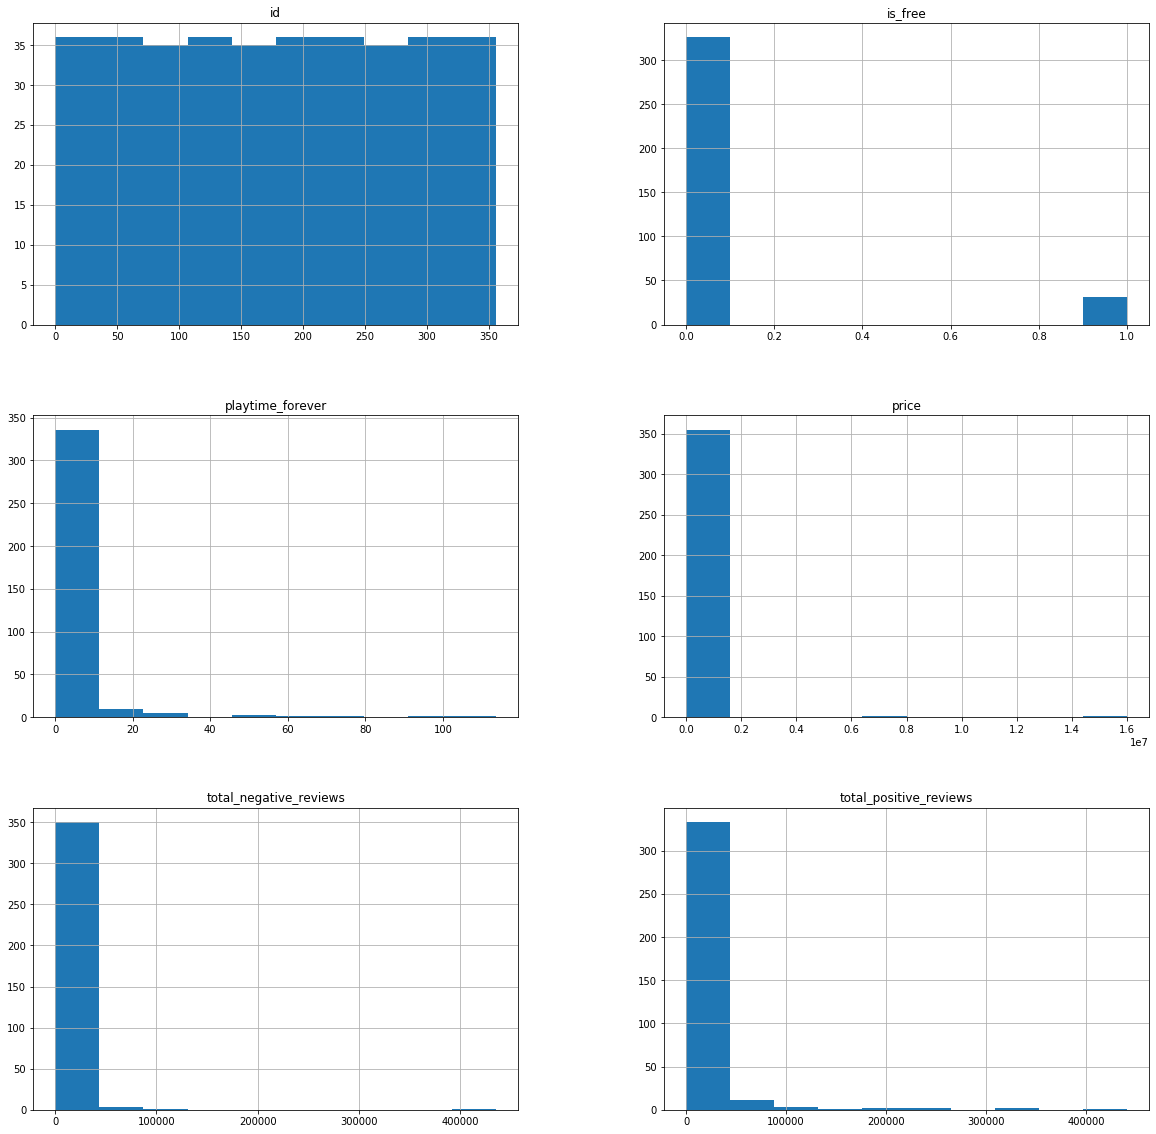

In [122]:
# Replacing columns with f/t with 0/1
df.replace({False: 0, True: 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20))

## Datetime

In [123]:
# Converting to datetime

# deal with purchase date
df["purchase_date"] = pd.to_datetime(df["purchase_date"])

# deal with release_date
df["release_date"] = pd.to_datetime(df["release_date"]) 

# get the different days between purchase_date and release_date
df["diff_day"] = df.apply(lambda raw: (raw["purchase_date"] - raw["release_date"]).days, axis=1)

# get the different years between purchase_date and release_date
df["diff_year"] = df["purchase_date"].dt.year - df["release_date"].dt.year

# delete purchase_date and release_date
df.drop(columns=["purchase_date", "release_date"], inplace=True)


# Replacing null values with the median
#df.days_since_purchased.fillna(df.days_since_purchased.median(), inplace=True)

#df.drop(['release_date','purchase_date'], axis=1, inplace=True)
#test_df.drop(['release_date','purchase_date'], axis=1, inplace=True)

In [108]:
df

,id,playtime_forever,is_free,price,genres,categories,tags,total_positive_reviews,total_negative_reviews,diff_day,diff_year
0,0,0.000000,0,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...",372.0,96.0,1665.0,5.0
1,1,0.016667,1,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...",23.0,0.0,472.0,1.0
2,2,0.000000,0,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...",3018.0,663.0,1616.0,4.0
3,3,1.533333,0,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",63078.0,1746.0,2434.0,6.0
4,4,22.333333,0,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...",8841.0,523.0,2043.0,6.0
5,5,2.933333,0,25800.0,RPG,"Single-player,Online Co-op,Local Co-op,Shared/...","RPG,Open World,Survival,Co-op,Fantasy,Online C...",NaN,NaN,NaN,NaN
6,6,2.616667,0,3600.0,"Action,Indie","Single-player,Steam Achievements,Steam Trading...","Great Soundtrack,Action,Violent,Indie,Top-Down...",39776.0,1035.0,1942.0,6.0
7,7,0.150000,1,0.0,Simulation,"Single-player,Multi-player,Online Multi-Player...","VR,Simulation,Utilities,Multiplayer",33.0,3.0,641.0,2.0
8,8,0.016667,0,4000.0,"Adventure,RPG","Single-player,Steam Achievements,Steam Trading...","RPG,Turn-Based,Adventure,Fantasy,Great Soundtr...",1875.0,39.0,1732.0,4.0
9,9,0.016667,0,8800.0,"Action,Adventure","Single-player,Steam Achievements,SteamVR Colle...","Action,Adventure,VR,Shooter,Puzzle,FPS,First-P...",47.0,11.0,66.0,0.0


In [128]:
# add negative rate and positive rate
df["negative_rate"] = df.apply(lambda raw: raw["total_negative_reviews"]\
                                               /(raw["total_negative_reviews"] + raw["total_positive_reviews"])\
                                               if raw["total_negative_reviews"] + raw["total_positive_reviews"] != 0\
                                               else 0.5, axis=1)
df["positive_rate"] = df.apply(lambda raw: raw["total_positive_reviews"]\
                                               /(raw["total_negative_reviews"] + raw["total_positive_reviews"])\
                                               if raw["total_negative_reviews"] + raw["total_positive_reviews"] != 0\
                                               else 0.5, axis=1)
df["total_reviews"] = df.apply(lambda raw: (raw["total_negative_reviews"] + raw["total_positive_reviews"]),\
                                               axis=1)

# delete total_positive_reviews and total_negative_reviews
df.drop(columns=["total_positive_reviews", "total_negative_reviews"], inplace=True)
df.head()

KeyError: ('total_negative_reviews', 'occurred at index 0')

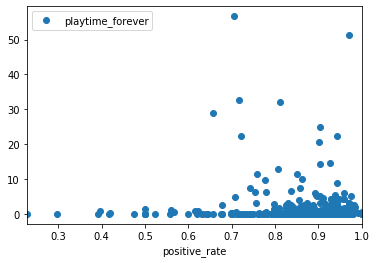

In [140]:
df.plot(x='positive_rate',y='playtime_forever',style='o')

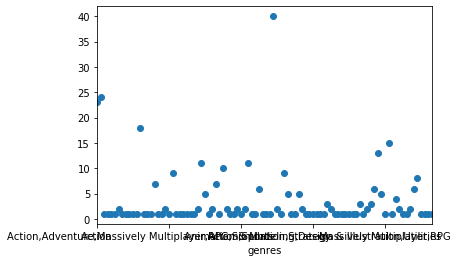

In [142]:
df.groupby('genres')['positive_rate'].nunique().plot(style='o')
plt.show()

## Plots after basic preprocessing

In [153]:
df.head()

,id,playtime_forever,is_free,price,genres,categories,tags,diff_day,diff_year,negative_rate,positive_rate,total_reviews
0,0,0.000000,0,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...",1665.0,5.0,0.205128,0.794872,468.0
1,1,0.016667,1,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...",472.0,1.0,0.000000,1.000000,23.0
2,2,0.000000,0,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...",1616.0,4.0,0.180114,0.819886,3681.0
3,3,1.533333,0,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",2434.0,6.0,0.026934,0.973066,64824.0
4,4,22.333333,0,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...",2043.0,6.0,0.055852,0.944148,9364.0


In [138]:
df.describe()

,id,playtime_forever,is_free,price,diff_day,diff_year,negative_rate,positive_rate,total_reviews
count,339.000000,339.000000,339.000000,339.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,176.312684,1.902262,0.091445,6199.407080,1024.721893,2.813609,0.156734,0.843266,15091.940828
std,102.797107,5.865955,0.288668,3821.600969,918.241720,2.612034,0.121571,0.121571,44180.110788
min,0.000000,0.000000,0.000000,0.000000,-481.000000,-2.000000,0.000000,0.227224,0.000000
25%,87.500000,0.000000,0.000000,3600.000000,387.000000,1.000000,0.077007,0.798163,878.750000
50%,175.000000,0.050000,0.000000,6400.000000,777.000000,2.000000,0.128698,0.871302,3192.500000
75%,264.500000,1.358333,0.000000,8800.000000,1484.750000,4.000000,0.201837,0.922993,10160.250000
max,356.000000,56.666667,1.000000,19000.000000,4320.000000,12.000000,0.772776,1.000000,458190.000000


Variables pairplot:


C:\Users\Kabir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Kabir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


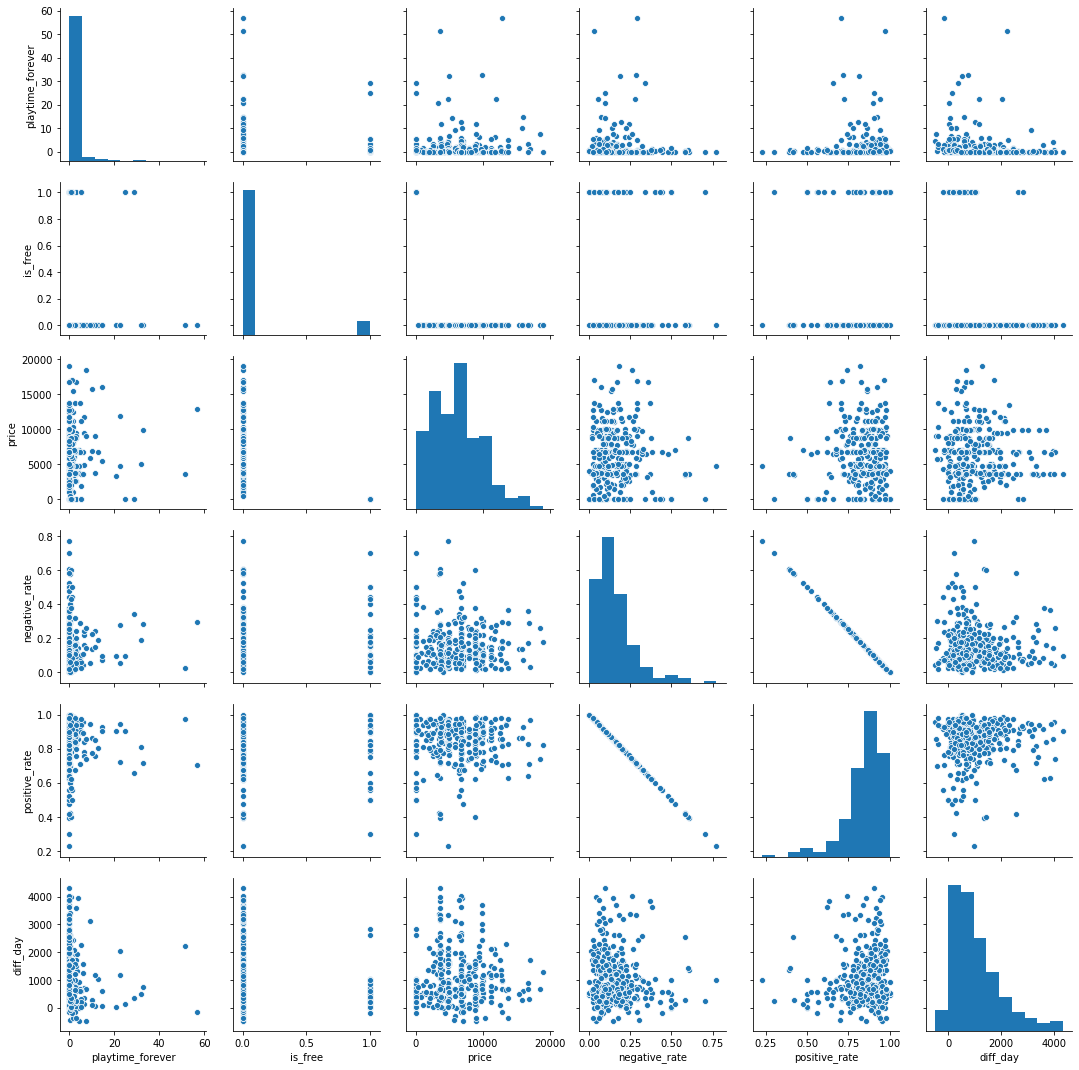

In [139]:
#variables pairplot
print('Variables pairplot:')
variables = ['playtime_forever','is_free','price','negative_rate','positive_rate','diff_day']
sns_plot = sns.pairplot(df[variables])
plt.show()

In [143]:
df.genres.value_counts().head()

Adventure,Indie           40
Action,Adventure          24
Action                    23
Action,Adventure,Indie    18
RPG                       15
Name: genres, dtype: int64

In [144]:
df.categories.value_counts().head()

Single-player,Steam Achievements,Full controller support,Steam Trading Cards,Steam Cloud    39
Single-player,Steam Achievements,Steam Trading Cards,Steam Cloud                            22
Single-player                                                                               20
Single-player,Steam Achievements,Full controller support,Steam Cloud                        11
Single-player,Steam Achievements,Steam Trading Cards                                        11
Name: categories, dtype: int64

In [164]:
# deal with genres, categories, tags
genres = df["genres"].str.get_dummies(",")
categories = df["categories"].str.get_dummies(",") 
tags = df["tags"].str.get_dummies(",") 
finish_df = pd.concat([df, genres, categories, tags], axis=1)
finish_df.head()

,id,playtime_forever,is_free,price,genres,categories,tags,diff_day,diff_year,negative_rate,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
0,0,0.000000,0,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...",1665.0,5.0,0.205128,...,0,1,0,0,0,0,0,0,0,0
1,1,0.016667,1,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...",472.0,1.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,2,0.000000,0,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...",1616.0,4.0,0.180114,...,0,0,0,0,0,0,0,0,0,0
3,3,1.533333,0,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",2434.0,6.0,0.026934,...,0,0,0,0,0,0,0,0,0,0
4,4,22.333333,0,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...",2043.0,6.0,0.055852,...,0,0,0,0,0,0,0,0,0,0


In [165]:
# delete useless columns
finish_df.drop(columns=["id", "is_free", "genres", "categories", "tags"], inplace=True)
finish_df.head()

,playtime_forever,price,diff_day,diff_year,negative_rate,positive_rate,total_reviews,Action,Adventure,Animation & Modeling,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
0,0.000000,3700.0,1665.0,5.0,0.205128,0.794872,468.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.016667,0.0,472.0,1.0,0.000000,1.000000,23.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,5000.0,1616.0,4.0,0.180114,0.819886,3681.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.533333,9900.0,2434.0,6.0,0.026934,0.973066,64824.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22.333333,4800.0,2043.0,6.0,0.055852,0.944148,9364.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
# change price and total_reviews to type(int)
finish_df[["total_reviews", "price"]] = finish_df[["total_reviews", "price"]].astype("int")
finish_df.head()

,playtime_forever,price,diff_day,diff_year,negative_rate,positive_rate,total_reviews,Action,Adventure,Animation & Modeling,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
0,0.000000,3700,1665.0,5.0,0.205128,0.794872,468,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.016667,0,472.0,1.0,0.000000,1.000000,23,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,5000,1616.0,4.0,0.180114,0.819886,3681,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.533333,9900,2434.0,6.0,0.026934,0.973066,64824,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22.333333,4800,2043.0,6.0,0.055852,0.944148,9364,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Outliers

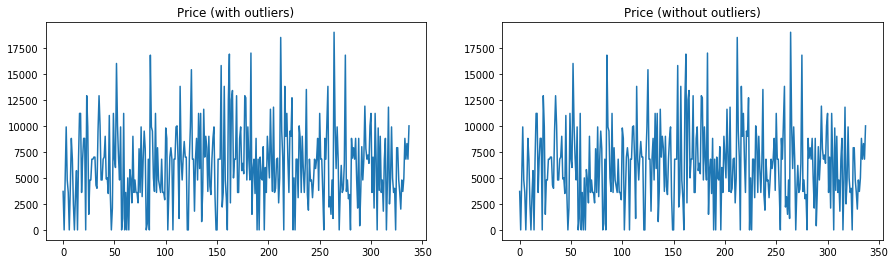

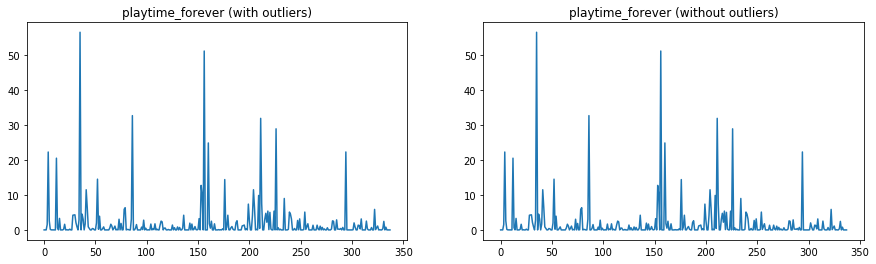

In [176]:
#Dropping the outlier rows with standard deviation
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    tolerance = 2
    fence_low  = q1 - tolerance*iqr
    fence_high = q3 + tolerance*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# Column: 'price'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.plot(finish_df['price'])
ax1.set_title('Price (with outliers)')

finish_df = remove_outlier(finish_df,'price')

ax2.plot(finish_df['price'])
ax2.set_title('Price (without outliers)')

plt.show()

# Column: 'playtime_forever'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.plot(finish_df['playtime_forever'])
ax1.set_title('playtime_forever (with outliers)')

finish_df = finish_df[finish_df['playtime_forever'] < 60]

ax2.plot(finish_df['playtime_forever'])
ax2.set_title('playtime_forever (without outliers)')

plt.show()
    
# ------------- Reset index -------------
finish_df.reset_index(inplace=True, drop=True)

In [213]:
print('Dataset shape: ', dataset.shape)
print(finish_df.info())
finish_df.head(5)

Dataset shape:  (357, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Columns: 368 entries, playtime_forever to eSports
dtypes: float64(5), int32(2), int64(361)
memory usage: 969.2 KB
None


,playtime_forever,price,diff_day,diff_year,negative_rate,positive_rate,total_reviews,Action,Adventure,Animation & Modeling,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
0,0.000000,3700,1665.0,5.0,0.205128,0.794872,468,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.016667,0,472.0,1.0,0.000000,1.000000,23,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,5000,1616.0,4.0,0.180114,0.819886,3681,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.533333,9900,2434.0,6.0,0.026934,0.973066,64824,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22.333333,4800,2043.0,6.0,0.055852,0.944148,9364,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preprocess Test Data

In [203]:
# Reading the test data
test_df = pd.read_csv('test.csv', parse_dates = ['purchase_date', 'release_date'])
print('Test data shape: ', test_df.shape)
print(test_df.info())
test_df.head(2)

Test data shape:  (90, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
id                        90 non-null int64
is_free                   90 non-null bool
price                     90 non-null int64
genres                    90 non-null object
categories                90 non-null object
tags                      90 non-null object
purchase_date             88 non-null datetime64[ns]
release_date              90 non-null datetime64[ns]
total_positive_reviews    88 non-null float64
total_negative_reviews    88 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 6.5+ KB
None


,id,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews
0,0,False,3500,"Action,Adventure","Single-player,Full controller support","Action,Adventure,Horror,Third Person,Singlepla...",2018-10-28,2012-05-22,2607.0,1122.0
1,1,False,11600,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",2019-07-20,2018-04-24,5762.0,2235.0


In [204]:
test_df["purchase_date"] = pd.to_datetime(test_df["purchase_date"])
test_df["release_date"] = pd.to_datetime(test_df["release_date"])

test_df["diff_day"] = test_df.apply(lambda raw: (raw["purchase_date"] - raw["release_date"]).days, axis=1)

# get the different years between purchase_date and release_date
test_df["diff_year"] = test_df["purchase_date"].dt.year - test_df["release_date"].dt.year

# delete purchase_date and release_date
test_df.drop(columns=["purchase_date", "release_date"], inplace=True)

test_df.head()

,id,is_free,price,genres,categories,tags,total_positive_reviews,total_negative_reviews,diff_day,diff_year
0,0,False,3500,"Action,Adventure","Single-player,Full controller support","Action,Adventure,Horror,Third Person,Singlepla...",2607.0,1122.0,2350.0,6.0
1,1,False,11600,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",5762.0,2235.0,452.0,1.0
2,2,False,2100,"Indie,Simulation,Strategy","Single-player,Steam Achievements,Steam Trading...","Strategy,Simulation,Indie,Political,Cold War,P...",687.0,133.0,848.0,2.0
3,3,False,3600,"Action,Strategy","Single-player,Multi-player,Co-op","Strategy,Action,Military,Tactical",67.0,39.0,3850.0,11.0
4,4,False,3400,"Action,Adventure","Single-player,Co-op,Steam Achievements,Full co...","Open World,Action,Comedy,Co-op,Third-Person Sh...",40344.0,3708.0,1282.0,4.0


In [205]:
test_df["diff_year"].fillna(test_df["diff_year"].median(), inplace=True)
test_df["diff_day"].fillna(test_df["diff_day"].median(), inplace=True)
test_df["total_positive_reviews"].fillna(test_df["total_positive_reviews"].median(), inplace=True)
test_df["total_negative_reviews"].fillna(test_df["total_negative_reviews"].median(), inplace=True)
test_df.head()


,id,is_free,price,genres,categories,tags,total_positive_reviews,total_negative_reviews,diff_day,diff_year
0,0,False,3500,"Action,Adventure","Single-player,Full controller support","Action,Adventure,Horror,Third Person,Singlepla...",2607.0,1122.0,2350.0,6.0
1,1,False,11600,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",5762.0,2235.0,452.0,1.0
2,2,False,2100,"Indie,Simulation,Strategy","Single-player,Steam Achievements,Steam Trading...","Strategy,Simulation,Indie,Political,Cold War,P...",687.0,133.0,848.0,2.0
3,3,False,3600,"Action,Strategy","Single-player,Multi-player,Co-op","Strategy,Action,Military,Tactical",67.0,39.0,3850.0,11.0
4,4,False,3400,"Action,Adventure","Single-player,Co-op,Steam Achievements,Full co...","Open World,Action,Comedy,Co-op,Third-Person Sh...",40344.0,3708.0,1282.0,4.0


In [206]:
# change reviews to rates
test_df["negative_rate"] = test_df.apply(lambda raw: raw["total_negative_reviews"]\
                                               /(raw["total_negative_reviews"] + raw["total_positive_reviews"])\
                                               if raw["total_negative_reviews"] + raw["total_positive_reviews"] != 0\
                                               else 0.5, axis=1)
test_df["positive_rate"] = test_df.apply(lambda raw: raw["total_positive_reviews"]\
                                               /(raw["total_negative_reviews"] + raw["total_positive_reviews"])\
                                               if raw["total_negative_reviews"] + raw["total_positive_reviews"] != 0\
                                               else 0.5, axis=1)
test_df["total_reviews"] = test_df.apply(lambda raw: (raw["total_negative_reviews"] + raw["total_positive_reviews"]),\
                                               axis=1)

# delete total_positive_reviews and total_negative_reviews
test_df.drop(columns=["total_positive_reviews", "total_negative_reviews"], inplace=True)
test_df.head()

,id,is_free,price,genres,categories,tags,diff_day,diff_year,negative_rate,positive_rate,total_reviews
0,0,False,3500,"Action,Adventure","Single-player,Full controller support","Action,Adventure,Horror,Third Person,Singlepla...",2350.0,6.0,0.300885,0.699115,3729.0
1,1,False,11600,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",452.0,1.0,0.279480,0.720520,7997.0
2,2,False,2100,"Indie,Simulation,Strategy","Single-player,Steam Achievements,Steam Trading...","Strategy,Simulation,Indie,Political,Cold War,P...",848.0,2.0,0.162195,0.837805,820.0
3,3,False,3600,"Action,Strategy","Single-player,Multi-player,Co-op","Strategy,Action,Military,Tactical",3850.0,11.0,0.367925,0.632075,106.0
4,4,False,3400,"Action,Adventure","Single-player,Co-op,Steam Achievements,Full co...","Open World,Action,Comedy,Co-op,Third-Person Sh...",1282.0,4.0,0.084173,0.915827,44052.0


In [207]:
# chategorial variable transformation using dummies
genres = test_df["genres"].str.get_dummies(",")
categories = test_df["categories"].str.get_dummies(",") 
tags = test_df["tags"].str.get_dummies(",") 
finish_test_df = pd.concat([test_df, genres, categories, tags], axis=1)
finish_test_df.head()

,id,is_free,price,genres,categories,tags,diff_day,diff_year,negative_rate,positive_rate,...,Violent,Visual Novel,Walking Simulator,War,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
0,0,False,3500,"Action,Adventure","Single-player,Full controller support","Action,Adventure,Horror,Third Person,Singlepla...",2350.0,6.0,0.300885,0.699115,...,0,0,0,0,0,0,0,0,0,0
1,1,False,11600,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",452.0,1.0,0.279480,0.720520,...,0,0,0,0,0,0,0,0,0,0
2,2,False,2100,"Indie,Simulation,Strategy","Single-player,Steam Achievements,Steam Trading...","Strategy,Simulation,Indie,Political,Cold War,P...",848.0,2.0,0.162195,0.837805,...,0,0,0,0,0,0,0,0,0,0
3,3,False,3600,"Action,Strategy","Single-player,Multi-player,Co-op","Strategy,Action,Military,Tactical",3850.0,11.0,0.367925,0.632075,...,0,0,0,0,0,0,0,0,0,0
4,4,False,3400,"Action,Adventure","Single-player,Co-op,Steam Achievements,Full co...","Open World,Action,Comedy,Co-op,Third-Person Sh...",1282.0,4.0,0.084173,0.915827,...,0,0,0,0,0,0,0,0,0,0


In [208]:
finish_test_df.drop(columns=["id","is_free", "genres", "categories", "tags"], inplace=True)

In [211]:
# change price and total_reviews to type(int)
finish_test_df[["total_reviews", "diff_day", "diff_year"]] = finish_test_df[["total_reviews", "diff_day", "diff_year"]].astype("int")
finish_test_df.head()

,price,diff_day,diff_year,negative_rate,positive_rate,total_reviews,Action,Adventure,Casual,Early Access,...,Violent,Visual Novel,Walking Simulator,War,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
0,3500,2350,6,0.300885,0.699115,3729,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11600,452,1,0.279480,0.720520,7997,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2100,848,2,0.162195,0.837805,820,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3600,3850,11,0.367925,0.632075,106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3400,1282,4,0.084173,0.915827,44052,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the dataset into Training set and Test set


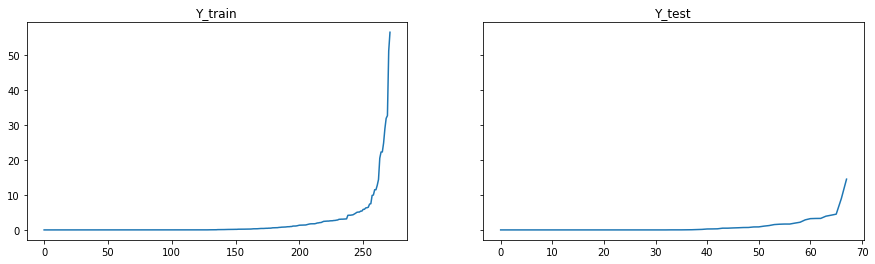

In [215]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4), sharey=True)
ax1.plot(np.sort(Y_train))
ax1.set_title('Y_train')

ax2.plot(np.sort(Y_test))
ax2.set_title('Y_test')

plt.show()

## Normalization

In [95]:
col_names = X.columns

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=col_names)
X_test = pd.DataFrame(scaler.transform(X_test), columns=col_names)

scaler = StandardScaler()
scaler.fit(X)
test_df = pd.DataFrame(scaler.transform(test_df), columns=col_names)

X_train.head()

,tags_retro,tags_action,tags_mechs,price,categories_online_co-op,tags_anime,tags_moba,tags_side_scroller,tags_third_person,tags_futuristic,...,tags_blood,tags_choices_matter,tags_mature,tags_cute,tags_cinematic,tags_war,tags_dating_sim,tags_diplomacy,tags_adventure,tags_games_workshop
0,-0.345458,0.811503,-0.105605,-0.763323,3.143247,-0.205294,-0.060746,4.292851,-0.503444,-0.214834,...,-0.086066,-0.371585,-0.296648,-0.214834,-0.150188,-0.232945,-0.105605,-0.086066,0.5547,0.0
1,-0.345458,0.811503,-0.105605,0.047402,-0.318142,-0.205294,-0.060746,-0.232945,-0.503444,-0.214834,...,-0.086066,-0.371585,3.370999,-0.214834,-0.150188,-0.232945,-0.105605,-0.086066,0.5547,0.0
2,-0.345458,-1.232282,-0.105605,0.152012,-0.318142,-0.205294,-0.060746,-0.232945,-0.503444,-0.214834,...,-0.086066,-0.371585,-0.296648,-0.214834,-0.150188,-0.232945,-0.105605,-0.086066,0.5547,0.0
3,-0.345458,-1.232282,-0.105605,1.302719,-0.318142,-0.205294,-0.060746,-0.232945,-0.503444,-0.214834,...,-0.086066,-0.371585,-0.296648,-0.214834,-0.150188,-0.232945,-0.105605,-0.086066,0.5547,0.0
4,2.894704,0.811503,-0.105605,-0.789476,-0.318142,-0.205294,-0.060746,-0.232945,-0.503444,-0.214834,...,-0.086066,-0.371585,-0.296648,-0.214834,-0.150188,-0.232945,-0.105605,-0.086066,0.5547,0.0


# Feature Selection